In [1]:
#import pandas library
import pandas as pd

In [2]:
#loading the dataset to use
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Understanding the dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Factors that may lead to employee attrition
1. Distance from home
2. Monthly Income
3. Relationship Satisfaction
4. Environment Satisfaction
5. Age
6. Job involvement
7. Years at company


### 1. A breakdown of distance from home by job role and attrition

In [7]:
#Checking job role column
df.JobRole



0                 Sales Executive
1              Research Scientist
2           Laboratory Technician
3              Research Scientist
4           Laboratory Technician
                  ...            
1465        Laboratory Technician
1466    Healthcare Representative
1467       Manufacturing Director
1468              Sales Executive
1469        Laboratory Technician
Name: JobRole, Length: 1470, dtype: object

In [8]:
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [9]:
# Preparing the subset
df_distancefromhome_jobrole = df[["DistanceFromHome","JobRole","Attrition"]]
df_distancefromhome_jobrole


,DistanceFromHome,JobRole,Attrition
0,1,Sales Executive,Yes
1,8,Research Scientist,No
2,2,Laboratory Technician,Yes
3,3,Research Scientist,No
4,2,Laboratory Technician,No
...,...,...,...
1465,23,Laboratory Technician,No
1466,6,Healthcare Representative,No
1467,4,Manufacturing Director,No
1468,2,Sales Executive,No


In [31]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Visualizing the relationship

<Figure size 14400x10800 with 0 Axes>

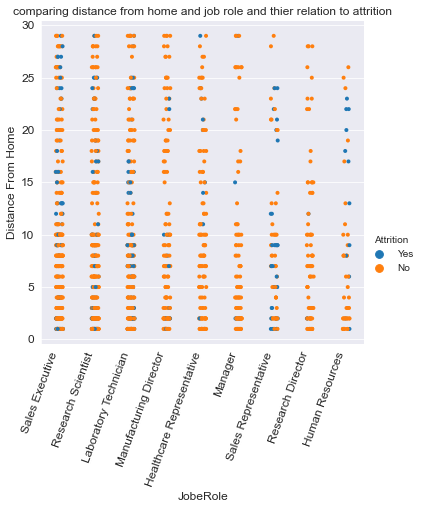

In [123]:
#plot
plt.figure(figsize=(200,150))
sns.set_style("darkgrid")
sns.catplot(data = df_distancefromhome_jobrole,
              x = "JobRole",
              y = "DistanceFromHome",
              s = 4,
              hue = "Attrition")
#labels
plt.title("comparing distance from home and job role and thier relation to attrition",
         fontsize = 12)
plt.xticks(rotation = 70,size = 12,ha = "right")
plt.yticks(size = 12)
plt.xlabel("JobeRole",fontsize = 12)
plt.ylabel("Distance From Home",fontsize = 12)

#render
plt.show()

In [125]:
fig = px.strip(df, 
                 x = "JobRole",
                 y = "DistanceFromHome",
                color = "Attrition",
                height = 800,
                title = "Comparing distance from home by job role and attrition")
fig.show()

In [12]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### 2. Comparing average monthly income by education and attrition

In [13]:
#preparing the subset
df_monthlyincome_education = df[["MonthlyIncome","Education","EducationField","Attrition"]]
df_monthlyincome_education

,MonthlyIncome,Education,EducationField,Attrition
0,5993,2,Life Sciences,Yes
1,5130,1,Life Sciences,No
2,2090,2,Other,Yes
3,2909,4,Life Sciences,No
4,3468,1,Medical,No
...,...,...,...,...
1465,2571,2,Medical,No
1466,9991,1,Medical,No
1467,6142,3,Life Sciences,No
1468,5390,3,Medical,No


In [14]:
#understanding the eduation column
df_monthlyincome_education["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [15]:
df_monthlyincome_education["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

#### Visualizing the relationship

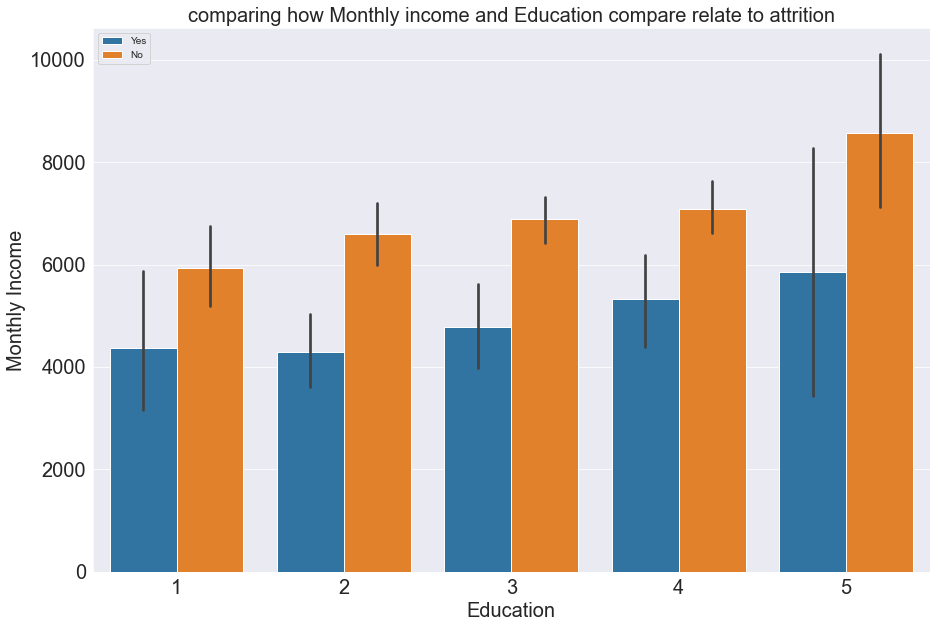

In [72]:
#plot
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.barplot(data = df_monthlyincome_education,
              x = "Education",
              y = "MonthlyIncome",
              hue = "Attrition"
             )
#labels
plt.title("comparing how Monthly income and Education compare relate to attrition",
         fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Education",fontsize = 20)
plt.ylabel("Monthly Income",fontsize = 20)
plt.legend()

#render
plt.show()

In [95]:
# Visualizing the data
fig = px.strip(df_monthlyincome_education,
                x = "Education",
                 y = "MonthlyIncome",
                 hover_data = ["EducationField"],
                 color = "Attrition",
                title = "Comparing monthly income by education and attrition ",
                height = 800)
fig.show()


### 3.0 Comparing Age by Years at company and attrition


In [17]:
# Preparing the subset
df_age_YearsAtCompany = df[["Age","YearsAtCompany","JobInvolvement","TotalWorkingYears","Attrition"]]
df_age_YearsAtCompany

,Age,YearsAtCompany,JobInvolvement,TotalWorkingYears,Attrition
0,41,6,3,8,Yes
1,49,10,2,10,No
2,37,0,2,7,Yes
3,33,8,3,8,No
4,27,2,3,6,No
...,...,...,...,...,...
1465,36,5,4,17,No
1466,39,7,2,9,No
1467,27,6,4,6,No
1468,49,9,2,17,No


In [18]:
df_age_YearsAtCompany["JobInvolvement"].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

#### Visualizing the relationship

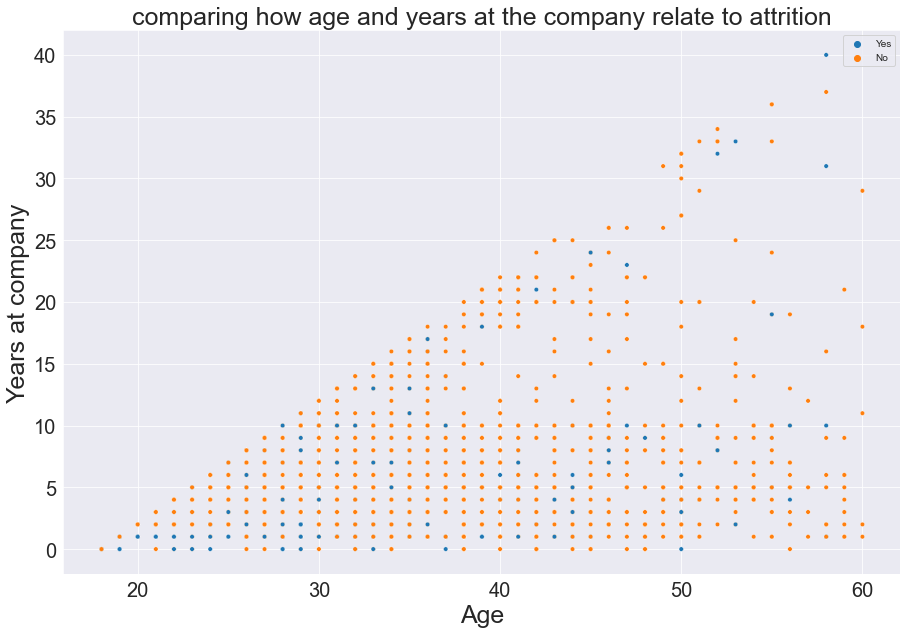

In [142]:
#plot
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.scatterplot(data = df_age_YearsAtCompany,
              x = "Age",
              y = "YearsAtCompany",
              hue = "Attrition",
                s = 20
             )
#labels
plt.title("comparing how age and years at the company relate to attrition",
         fontsize = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Age",fontsize = 25)
plt.ylabel("Years at company",fontsize = 25)
plt.legend()

#render
plt.show()

In [19]:
# Visualizing the dataset
fig = px.scatter(df_age_YearsAtCompany,
                x = "Age",
                y = "YearsAtCompany",
                hover_data = ["JobInvolvement","TotalWorkingYears"],
                color = "Attrition",
                height = 800)
fig.show()

### 4. Checking the relationship between Enviromnemt satisfaction,job satisfaction and Relationship satisfaction and attrition

In [20]:
# Preparing the subset
df_Environment_Relationship_satisfaction = df[["Attrition","EnvironmentSatisfaction","RelationshipSatisfaction","JobSatisfaction"]]
df_Environment_Relationship_satisfaction

,Attrition,EnvironmentSatisfaction,RelationshipSatisfaction,JobSatisfaction
0,Yes,2,1,4
1,No,3,4,2
2,Yes,4,2,3
3,No,4,3,3
4,No,1,4,2
...,...,...,...,...
1465,No,3,3,4
1466,No,4,1,1
1467,No,2,2,2
1468,No,4,4,2


#### Visualizing the relationship

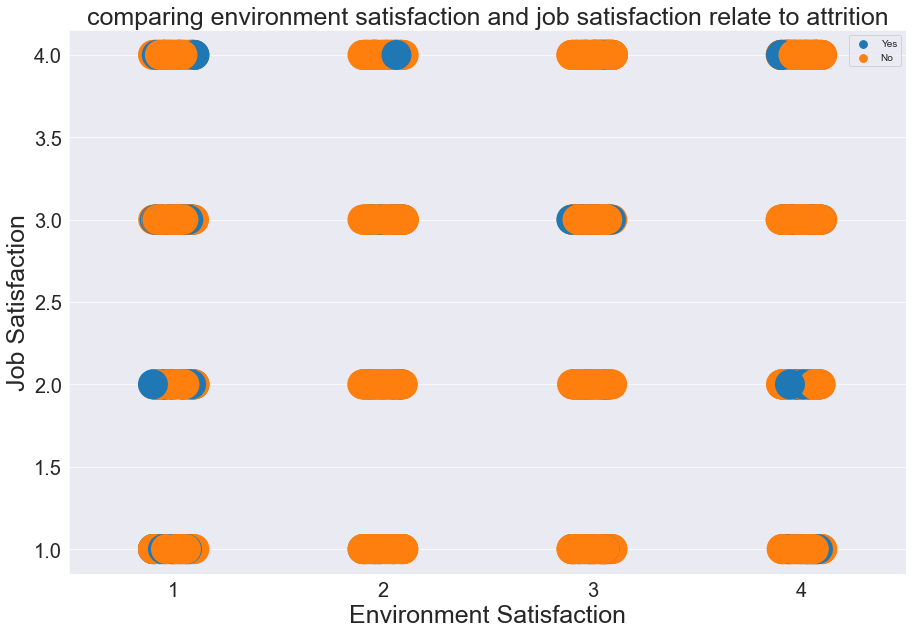

In [138]:
#plot
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.stripplot(data = df_Environment_Relationship_satisfaction,
              x = "EnvironmentSatisfaction",
              y = "RelationshipSatisfaction",
              hue = "Attrition",
              s = 30
             )
#labels
plt.title("comparing environment satisfaction and job satisfaction relate to attrition",
         fontsize = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Environment Satisfaction",fontsize = 25)
plt.ylabel("Job Satisfaction",fontsize = 25)
plt.legend()

#render
plt.show()

In [146]:
# Visualizing the dataset
fig = px.bar(df_Environment_Relationship_satisfaction,
               x = "Attrition",
                y = "EnvironmentSatisfaction",
                color = "JobSatisfaction",
               hover_data = ["RelationshipSatisfaction"],
                height = 800)
fig.show()

### 5. Perfomance rating and attrition

In [22]:
# preparing the subset
df_perfomance_rate = df[["Attrition","PerformanceRating"]]
df_perfomance_rate

,Attrition,PerformanceRating
0,Yes,3
1,No,4
2,Yes,3
3,No,3
4,No,3
...,...,...
1465,No,3
1466,No,3
1467,No,4
1468,No,3


#### Visualizing the relationship

<Figure size 2160x1800 with 0 Axes>

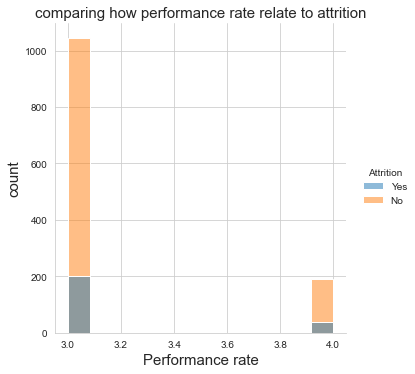

In [106]:
#plot
plt.figure(figsize=(30,25))
sns.set_style("whitegrid")
sns.displot(data = df_perfomance_rate,
              x = "PerformanceRating",
              hue = "Attrition"
             )
#labels
plt.title("comparing how performance rate relate to attrition",
         fontsize = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel("Performance rate",fontsize = 15)
plt.ylabel("count",fontsize = 15)

#render
plt.show()

In [23]:
# Visualizing the dataset
fig = px.histogram(df_perfomance_rate,
            x = "PerformanceRating",
            height = 500,
            color = "Attrition",
            nbins = 2)
fig.show()

### 6.0 Comparing how years in current role and years since last promotion relate to attrition

In [24]:
df_YearsAtCurrentRole = df[["Attrition","YearsSinceLastPromotion","YearsWithCurrManager"]]
df_YearsAtCurrentRole

,Attrition,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,0,5
1,No,1,7
2,Yes,0,0
3,No,3,0
4,No,2,2
...,...,...,...
1465,No,0,3
1466,No,1,7
1467,No,0,3
1468,No,0,8


#### Visualizing the relationship

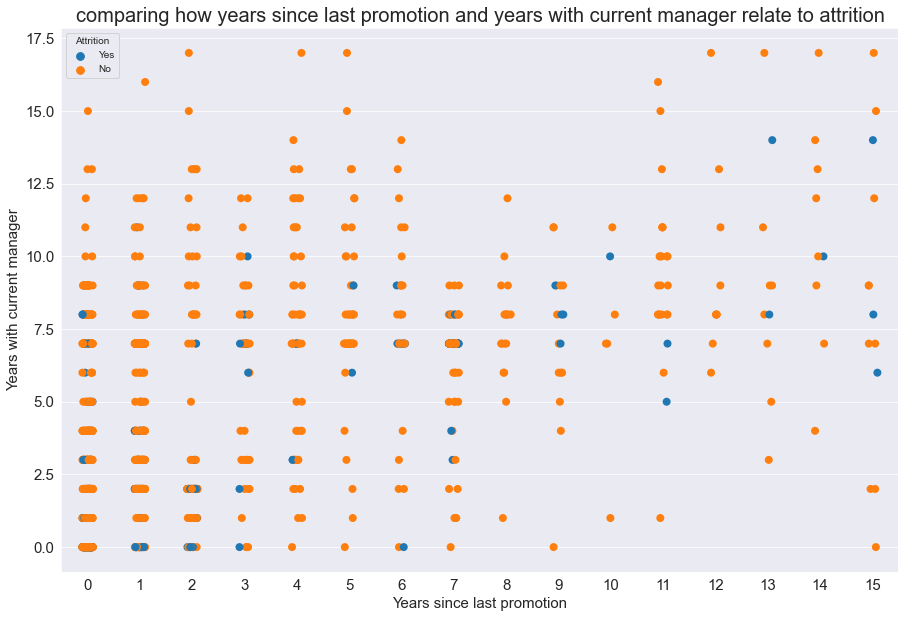

In [141]:
#plot
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.stripplot(data = df_YearsAtCurrentRole,
              x = "YearsSinceLastPromotion",
              y = "YearsWithCurrManager",
              hue = "Attrition",
              s = 8
             )
#labels
plt.title("comparing how years since last promotion and years with current manager relate to attrition",
         fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Years since last promotion",fontsize = 15)
plt.ylabel("Years with current manager",fontsize = 15)

#render
plt.show()

In [113]:
fig = px.strip(df_YearsAtCurrentRole,
                x = "YearsSinceLastPromotion",
                y = "YearsWithCurrManager",
                color = "Attrition")
fig.show()